# 1. Collaborative Filtering(CF)
## 1.1 CF 문제 정의
**협업 필터링(Collaborative Filtering, CV)**

'많은 유저들로부터 얻은 기호 정보'를 이용해 유저의 고나심사를 자동으로 예측하는 방법
- Collaborative : 집단적 협업, 다수의 의견 활용
- 더 많은 유저/아이템 데이터가 축적될수록 협업의 효과는 커지고 추천은 정화해질 것이란 가정에서 출발.
- ex) '노트북'을 보거나 구매한 유저들이 구매한 다른 상품을 추천

**CF 기반 추천 시스템**

- 최종 목적 : 유저 u가 아이템 i에 부여할 평점을 예측!

- 방법
    - 1. 주어진 데이터를 활용해 유저-아이템 행렬을 생성한다.
    - 2. 유사도 기준을 정하고, 유저 혹은 아이템 간의 유사도를 구한다.
    - 3. 주어진 평점과 유사도를 활용하여 행렬으 비어 있는 값(평점)을 예측한다.

## 1.2 CF 원리
**CF 기반 추천 시스템의 원리**

유저 A와 비슷한 취향을 가진 유저들이 선호하는 아이템을 추천
- 아이템이 가진 속성을 사용하지 않으면서도 높은 추천 성능을 보인다.
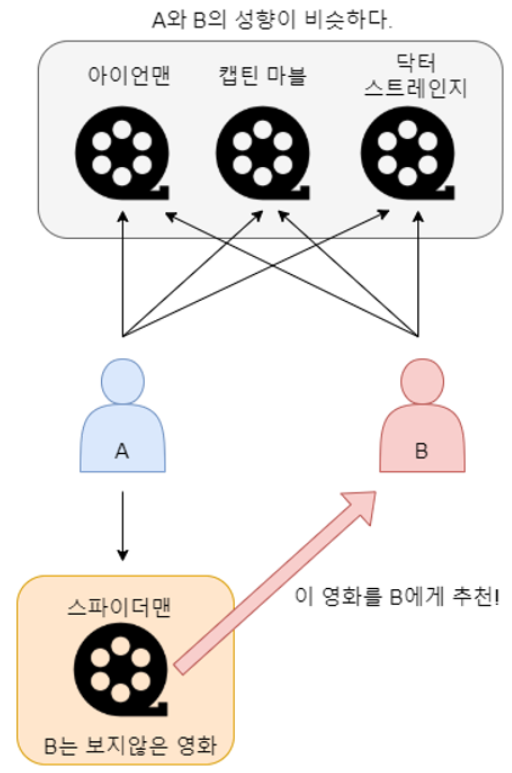

## 1.3 CF 분류
- Neighborhood-based CF (memory-based CF)
    - User-based
    - Item-based
    

- Model-based CF
    - Non-parametric(KNN, SVD)
    - Matrix Factorization
    - Deep Learning
    
    
- Hybrid CF
    - Content-based Recommendation과의 결합

# 2. Neighborhood-based CF
## 2.1 User-based CF(UBCF)
**유저 기반 협업 필터링(User-based CF, UBCF)**
- 두 유저가 얼마나 유사한 아이템을 선호하는가?
- 유저 간 유사도를 구한 뒤, 타겟 유저와 유사도가 높은 유저들이 선호하는 아이템을 추천
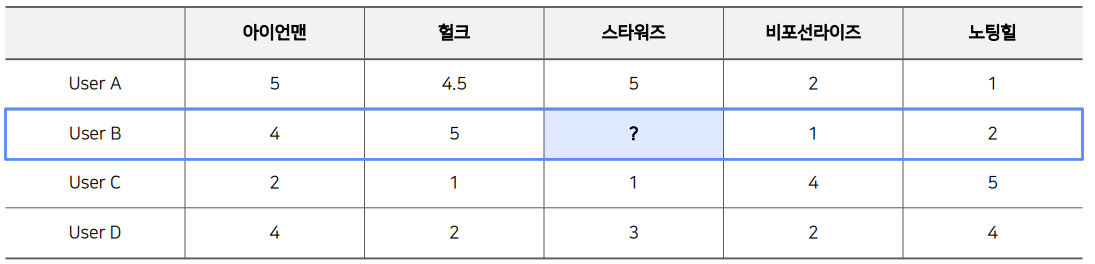
- 직관적으로 유저 B는 유저 A와 비슷한 취향을 가진다.
    - 다시 말해, 유저 A와 B의 유사도가 높다(mathmatically highly correlated)
    - 따라서 유저 B의 스타워즈에 대한 선호도는 유저 A와 비슷하게 높을 것으로 예측된다.

## 2.2 Item-based CF(IBCF)
**아이템 기반 협업 필터링(Item-based CF, IBCF)**
- 두 아이템이 유저들로부터 얼마나 유사한 평점을 받았는가?
- 아이템간 유사도를 구한 뒤, 타겟 아이템과 유사도가 높은 아이템 중 선호도가 큰 아이템을 추천
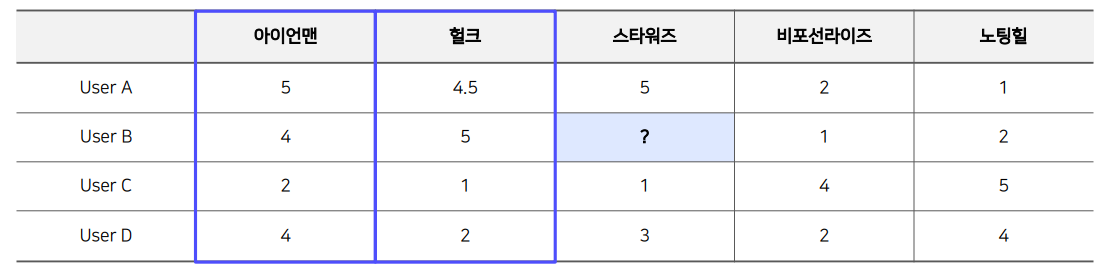
- 직관적으로 스타워즈는 아이언맨, 헐크와의 유사도가 높다.
    - 반대로 비포 선라이즈, 노팅힐은 스타워즈와의 유사도가 낮다.
    - 따라서 유저 B의 스타워즈에 대한 평점은 아이언맨, 헐크와 비슷하게 높을 것이다.

## 2.3 Neighborhood-based CF(NBCF)
**이웃 기반 협업 필터링(Neighborhood-based CF, NBCF)**

- 최종 목적 : 유저 u가 아이템 i에 부여할 평점을 예측하는 것

- 특징
    - 구현이 간단하고 이해가 쉽다.
    - 아이템이나 유저가 계속 늘어날 경우 확장성이 떨어진다.(Scalability)
    - 주어진 평점/선호도 데이터가 적을 경우, 성능이 저하된다.(Sparsity)

**Sparsity**

- 주어진 데이터를 활용해 유저-아이템 행렬을 만든다.
    - 실제로 행렬 대부분의 원소를 비어있다.(sparse matrix, 희소 행렬)

- ex) Netflix
    - 유저 : 100M, 영화 : 500K
    - 평균적으로 한 명의 유저가 몇 개의 영화를 봤을까?
    
- NBCF를 적용하려면 적어도 sparsity ratio가 99.5를 넘지 않는 것이 좋다.
    - 그렇지 않을 경우 모델 기반 CF를 사용해야 한다. ex) Matrix Factorization

# 3. K-Nearest Neighbors CF(KNN CF) & Similarity Measures
## 3.1 K-Nearest Neighbors CF(KNN CF)
**NBCF의 한계**

아이템 $i$에 대해 평점 예측을 하기 위해서는 $\Omega_i$에 속한 모든 유저와의 유사도를 구해야 한다.($\Omega_i$:아이템 $i$에 대한 평가를 한 유저 집합)

그런데, 유저가 많아질 경우 계속해서 연산은 늘어나고 오히려 성능이 떨어진다.

**KNN 협업 필터링(k-nearest neighbors CF, KNN CF)의 아이디어**

$\Omega_i$에 속한 유저 가운데 유저 $u$와 가장 유사한 K명의 유저(KNN)를 이용해 평점을 예측한다.
- 유사하다는 것은 우리가 정의한 유사도 값이 크다는 것을 의미한다.
- 보통 K = 25 ~ 50을 많이 사용하고, 직접 정해야하는 하이퍼 파라미터이다.

**KNN CF의 예시 : 1-NN CF**

유저 B와 가장 유사한 1명의 유저 A의 평점 데이터를 이용해 평점을 예측한다.
-> 유저 B의 스타워즈에 예측 평점은 5
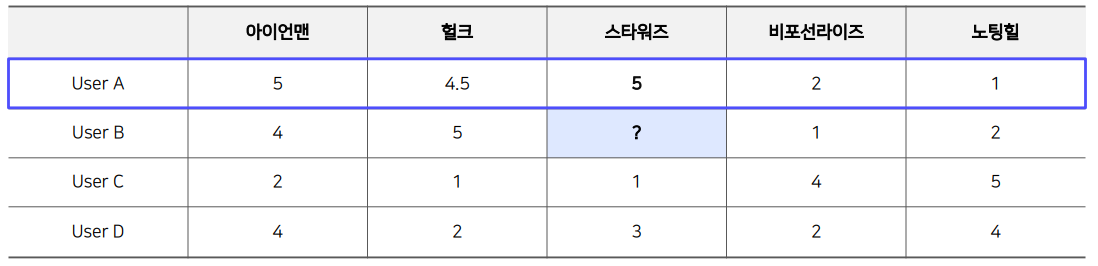

## 3.2 Similarity Measure
**유사도 측정법(Similarity Measure)**

: 두 개체 간의 유사성을 수량화하는 실수 값 함수 혹은 척도
- 유사성에 대한 여러 정의가 존재하지만 일반적으로는 거리의 역수 개념을 사용한다.
- 따라서 두 개체 간 거리를 어떻게 측정하냐에 따라 유사도 측정밥법이 달라진다.

**Mean Squared Difference Similarity**

주어진 유저-아이템 rating에 대하여,

- $msd(u, v) = \frac{1}{|I_{uv}\ |}\cdot \sum_{i\in I_{uv}}(r_{ui}-r_{vi})^2$, $msd\_sim(u, v)=\frac{1}{msd(u,v)+1}$


- $msd(i, j) = \frac{1}{|U_{ij}\ |}\cdot \sum_{u\in U_{uv}}(r_{ui}-r_{vi})^2$, $msd_{sim(i, j)}=\frac{1}{msd(i,j)+1}$

추천시스템에서 주로 사용되는 유사도
- 각 기준에 대한 점수의 차이를 계산, 유사도는 유클리드 거리에 반비례
- 분모가 0이 되는 것을 방지하기 위해 분모에 1이 더해짐(smoothing)

**Cosine Similarity**

- 주어진 두 벡터 X, Y에 대하여 $cos(\theta) = cos(X, Y) = \frac{X\cdot Y}{|X||Y|} = \frac{\sum_{i=1}^{N}X_iY_i}{\sqrt{\sum_{i=1}^{N}X_i^2}\sqrt{\sum_{i=1}^{N}Y_i^2}}$


- 두 벡터의 각도를 이용하여 구할 수 있는 유사도


- 직관적으로 두 벡터가 가리키는 방향이 얼마나 유사한지를 의미한다.
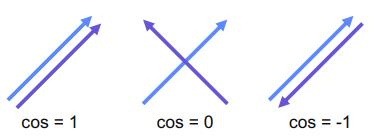

**Pearson Similarity(Pearson Correlation)**

주어진 두 벡터 X, Y에 대하여

$pearson\_sim(X,Y) = \sum_{i=1}^{N}(X_i-\overline{X})(Y_i-\overline{Y}) / \sqrt{\sum_{i=1}^{N}(X_i-\overline{X})^2}\sqrt{\sum_{i=1}^{N}(Y_i-\overline{Y})^2}$

각 벡터를 표본평균으로 정규화한 뒤에 코사인 유사도를 구한 값
- 직관적으로 해석하면 (X와 Y가 함께 변하는 정도) / (X와 Y가 따로 변하는 정도)
- 1에 가까우면 양의 상관관계, 0일 경우 서로 독립, -1에 가까울수록 음의 상관관계를 나타낸다.

**jaccard Similarity**
주어진 두 집합 A, B에 대하여

$J(A,B) = \frac{|A\bigcap B|}{|A\bigcup B|} = \frac{|A\bigcap B|}{|A|+|B|-|A\bigcap B|}$

집합의 개념을 사용한 유사도
- Cosine, Pearson 유사도와 달리 길이(차원)이 달라도 이론적으로 유사도 계산 가능하다.
- 두 집합이 같은 아이템을 얼마나 공유하고 있는지를 나타낸다.
    - 두 집합이 가진 아이템이 모두 같으면 1
    - 두 집합에 겹치는 아이템이 하나도 없으면 0

# 4. Rating Prediction
## 4.1 UBCF
### 4.1.1 Absolute Rating
**Average**

다른 유저들의 스타워즈에 대한 rating 평균을 낸다.

유저 B의 입장에서 볼 때, 유저 A, C, D의 rating을 동일하게 반영하는 것이 적절한가?
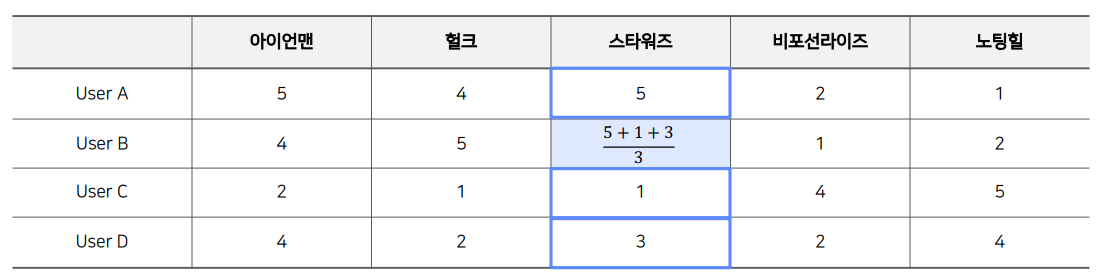

**Weighted Average**

유저 간의 유사도 값을 가중치(Weight)로 사용하여 rating의 평균을 낸다.
- 유저 B의 입장에서, 유저 A의 rating은 많이 반영되고 유저 C의 rating은 적게 반영되어 예측 평점을 계산한다.
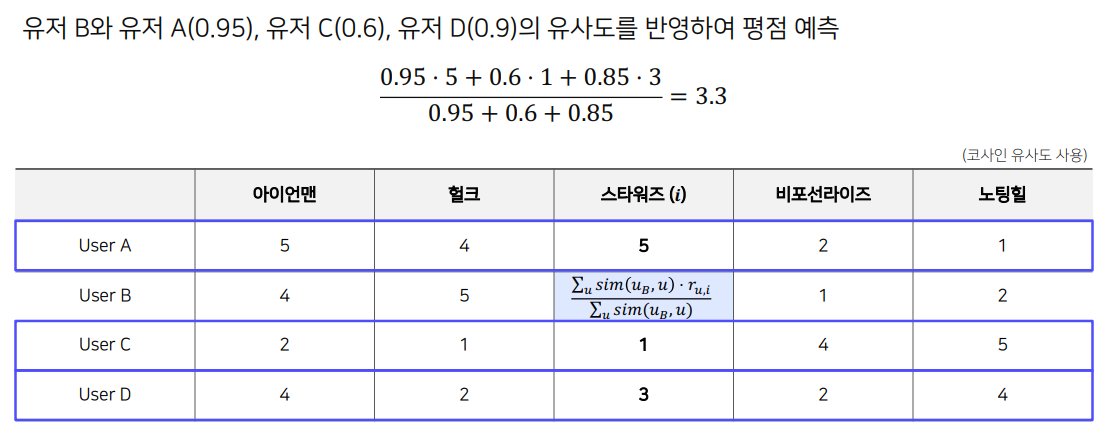

**Absolute Rating Formula**

전체 유저 $U$, 아이템 $I$에 대한 평점 데이터가 존재할 때, 유저 $u$의 아이템 $i$에 대한 평점 $\hat{r}(u,I)$을 예측해보자.

아이템 $i$에 대한 평점이 있으면서 유저 u와 유사한 유저들의 집합을 $\Omega_i$라고 하면,

1) Average : $\hat{r}(u,i) = \frac{\sum_{u'\in \Omega_\ i}r(u',i)}{|\Omega_i|}$


2) Weighted Average: $\hat{r}(u,i) = \frac{\sum_{u'\in \Omega_\ i}sim(u,u')r(u',i)}{\sum_{u'\in \Omega_\ i}sim(u,u')}$

**Absolute Rating의 한계**

유저가 평점을 주는 기준이 제각기 다르다.
- 어떤 유저는 전체적으로 높게 평점을 줄 수도 있고 반대로 낮게 줄 수도 있다.
- 긍정적 유저 : 대부분 5점을 주고 부정적인 평가로 3점을 준다.
- 부정적 유저 : 대부분 1~2점을 주고 가끔 4점을 준다.

### 4.1.2 Relative Rating
**상대적 평점(Relative Rating)의 개념**

유저의 평균 평점에서 얼마나 높은지 혹은 낮은지, 그 편차(Deviation)를 사용한다.
- 어떤 유저의 평균이 2.5점인데 5점을 줬다면 아주 높게 평가한 것이다.
- 모든 아이템의 평점을 5점으로 준 유저는 아이템간 비교가 어렵다.
- $dev(u,i) = r(u,i) - \overline{r_u}\ \ \ for\ known\ rating$ 

**Relative Rating Formula**

모든 평점 데이터를 deviation 값으로 바꾼 뒤 원래의 rating이 아닌 deviation을 예측한다.
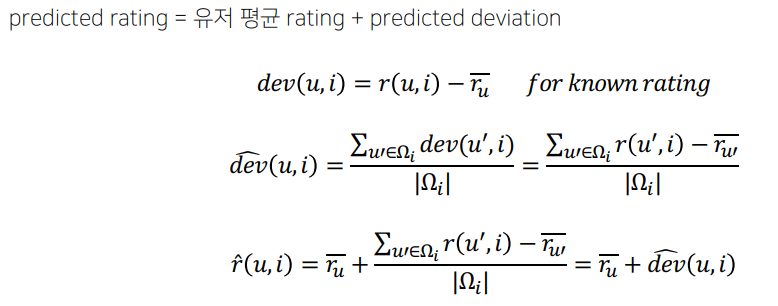

**Using Deviation**
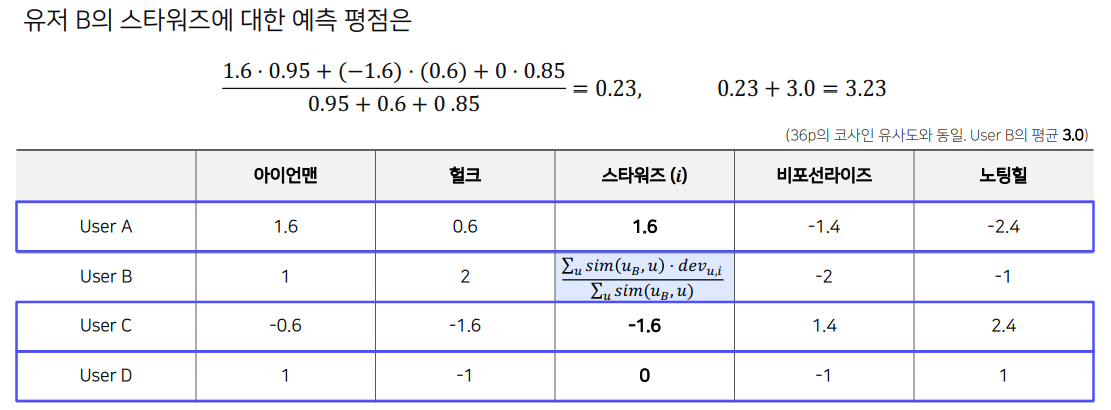

**Absolute Rating vs. Relative Rating**

deviation과 유사도 기반 weighted average prediction을 결합하여 최종 수식을 비교하면 다음과 같다.
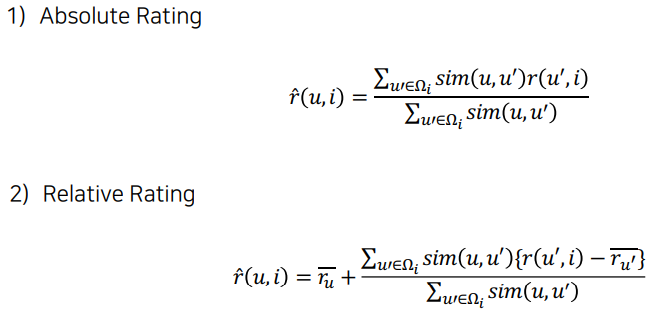

## 4.2 IBCF
### 4.2.1 Absolute Rating
**Weighted Average**
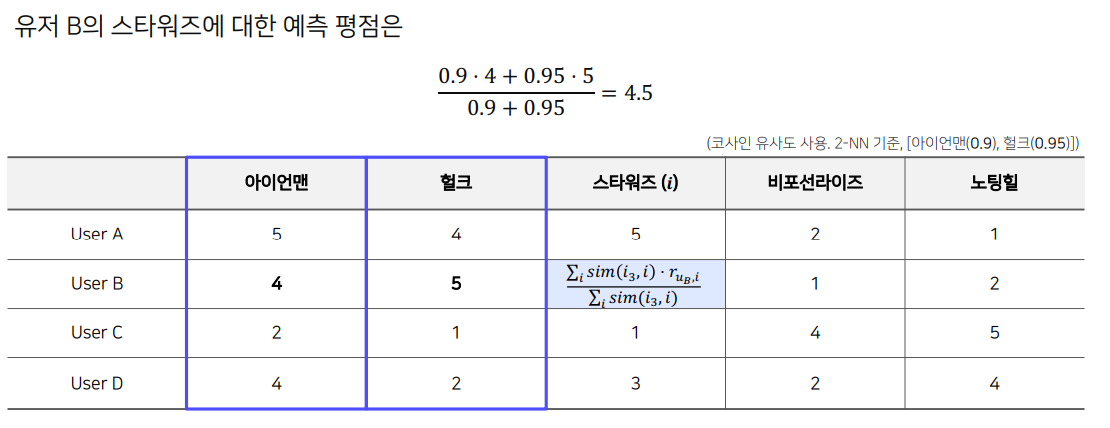

### 4.2.2 Relative Rating
**Using Deviation**
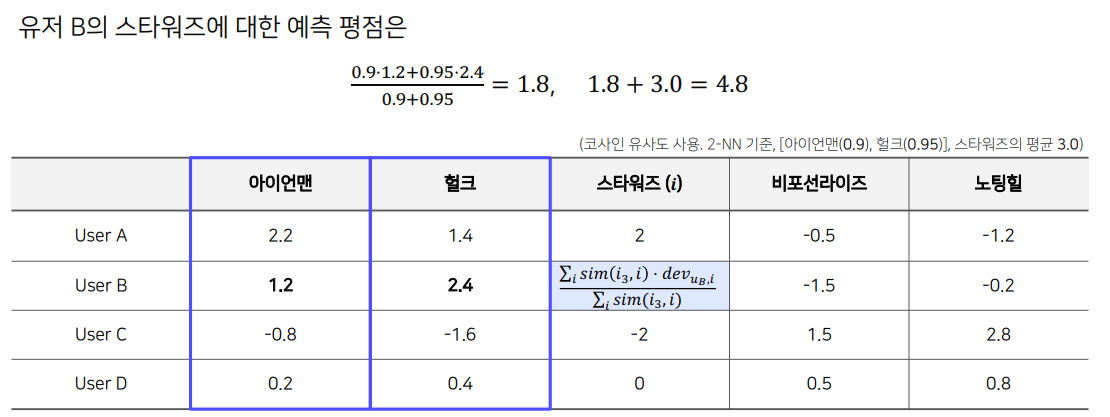

**Absolute Rating vs. Relative Rating**

deviation과 유사도 기반 weighted average prediction을 결합하여 최종 수식을 비교하면 다음과 같다.
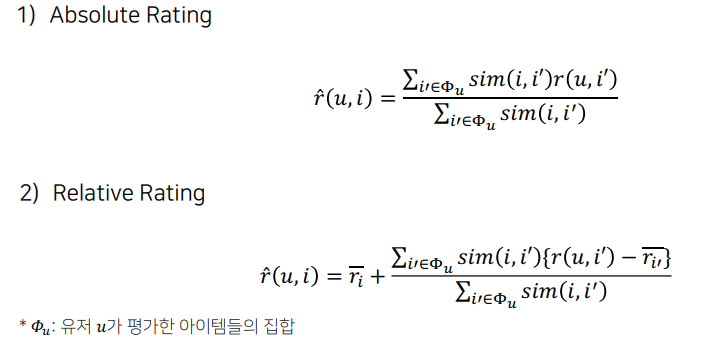

## 4.3 Top-N Recommendation
**CF in Recommendation System**

- Collaborative Filtering의 최종 목적 : 유저 u가 아이템 i에 부여할 평점을 예측하는 것


- Recommendation System의 최종 목적 : 예측 평점이 높은 아이템을 유저에게 추천하는 것 -> Top-N Recommendation!

**Top-N Recommendation**

타겟 유저에 대한 아이템의 예측 평점 계산 완료되면 높은 순으로 정렬하여 상위 N개만 뽑아 추천.

- Recommentaion System의 최종 목적 : 예측 평점이 높은 아이템을 유저에게 추천하는 것
    - Top-N Recommendation
    - 추천 완료